# Fashion MNIST image classification using Xgboost


In [7]:
from keras.datasets import fashion_mnist
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

<h4>Fetch randomly shuffled data, split into training and test sets</h4>

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

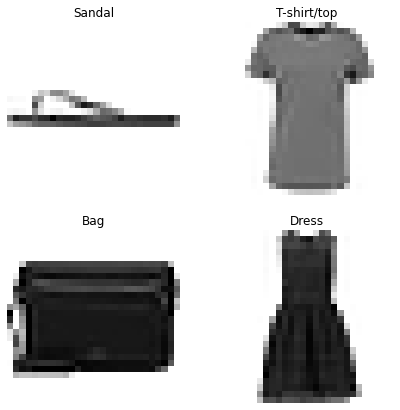

In [10]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Data Preprocessing

****Reshape training data into a flat array of length 784.****

In [5]:
flat = 28 * 28
X_train = X_train.reshape(60000, flat)
X_test = X_test.reshape(10000, flat)

****Noramalize the data set****

In [6]:
X_train /= 255.
X_test /= 255.

In [7]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## Fitting the models

****Use Xgboost model to fit the data****

### Model 1

In [ ]:
import xgboost as xgb

In [46]:
model_1 = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1)
model_1.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [48]:
model_1.score(X_test, y_test)

0.8582

****Display model and results****

In [12]:
from sklearn import metrics

****make predictions on test dataset****

In [13]:
expected_y  = y_test
predicted_y = model.predict(X_test)

****Check predictions accuracy****

In [18]:
print(); print(metrics.classification_report(expected_y, predicted_y, target_names=class_names))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

 T-shirt/top       0.81      0.83      0.82      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.74      0.76      0.75      1000
       Dress       0.85      0.89      0.87      1000
        Coat       0.74      0.78      0.76      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.68      0.58      0.62      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


[[832   0  10  42   8   1  92   0  15   0]
 [  4 960   5  22   3   0   4   0   2   0]
 [ 16   1 761   8 140   0  67   0   7   0]
 [ 24   6  12 893  31   0  32   0   2   0]
 [  0   1 112  39 778   0  68   0   2   0]
 [  0   0   0   1   0 94

### Model 2
Increasing the number of estimators

In [49]:
model_2 = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1, n_estimators=300)
model_2.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [50]:
model_2.score(X_test, y_test)

0.8824

### Model 3
Changing the learning rate

In [51]:
model_3 = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_jobs=-1, n_estimators=300, learning_rate=0.3)
model_3.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [52]:
model_3.score(X_test, y_test)

0.8966

## Conclusion

I've tested 3 different XGBoost models.  
We can see how changing a single hyper-parameter can improve the model.